# Three Examples From the SOD paper (Chelidze and Zhou 2006)
* Fixed frequency component with various amplitudes
* Fixed amplitude component with various frequencies
* Variable amplitudes and frequency

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/lhwx1224/HOD_git/blob/master/HenkelMatrix_ST_harmonics.ipynb)

In [1]:
# Load Environment
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
from ghenkel import ghenkel
from henkelsvd import henkelsvd
from henkelsvd_modes import henkelsvd_modes
from henkelsvd_coords import henkelsvd_coord
color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
linestyle = ['-','--','-.',':']
'''
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
'''

"\nfrom matplotlib import rc\nrc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})\n## for Palatino and other serif fonts use:\n#rc('font',**{'family':'serif','serif':['Palatino']})\nrc('text', usetex=True)\n"

## Sinusoidal Spatio-temporal Data and its Decomposition
### 1. Identical frequency with various amplitudes
Let's consider the following ficticious field:
\begin{equation}
    y_k = (11-k)\,\mathrm{sin}(40\pi kt),\, k = 1,\,...\,,10
\end{equation}
a rank-1 case where only rigid body motion exists (a rigid rod driven by a harmonic torque).

====================== HenkelSVD =======================
Number of modes to return: 10
Rank of the data matrix: 1
======================= gHenkel =========================
---------------------------------------------------------
Geneal Henkel matrix is generated!
Delay time step: 1
Number of delay-coordinates: 40
Dimension of H: (400, 9961)
SVD to the delay-time-embedded data is done!


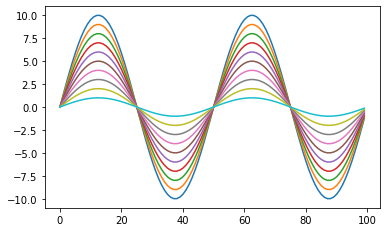

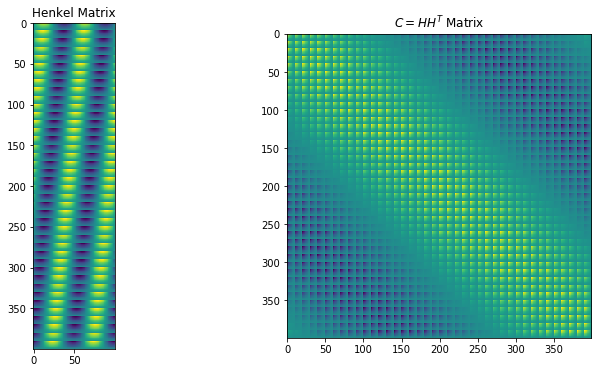

In [2]:
# Construct matrix whose rows are sinusoids with identical frequency and various amplitudes (third example in Chelidze and Zhou 2006)
n = 10000
tmax = 10
t = np.linspace(0,tmax,n)
k = 10
Y = np.zeros((k,len(t)),dtype = float)
m = np.shape(Y)[0]
fig, axes = plt.subplots(figsize=(6,6*0.618))
for i in np.arange(k):
    Y[i,:] = (10-i)*np.sin(2*np.pi*20*t)
    axes.plot(Y[i,0:100])

M = 40
d = 1
Modes, H, U, S, V = henkelsvd(Y, 40, 1, 10)

C = 1/M*np.dot(H,H.T)
fig, axes = plt.subplots(1,2,figsize=(12,6))
axes[0].imshow(H[:,0:100])
axes[0].set_title('Henkel Matrix')
axes[1].imshow(C)
axes[1].set_title('$C = HH^T$'+' Matrix')
plt.show()

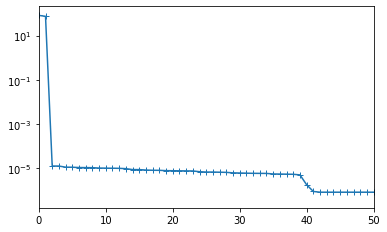

In [3]:
# U,S,V = np.linalg.svd(H) # Try TSVD
#fig, axes = plt.subplots(figsize=(6,6))
#axes.imshow(U)
#plt.show()
fig, axes = plt.subplots(figsize=(6,6*0.618))
axes.semilogy(np.sqrt(S),marker = '+')
axes.set_xlim(0,50)
plt.show()

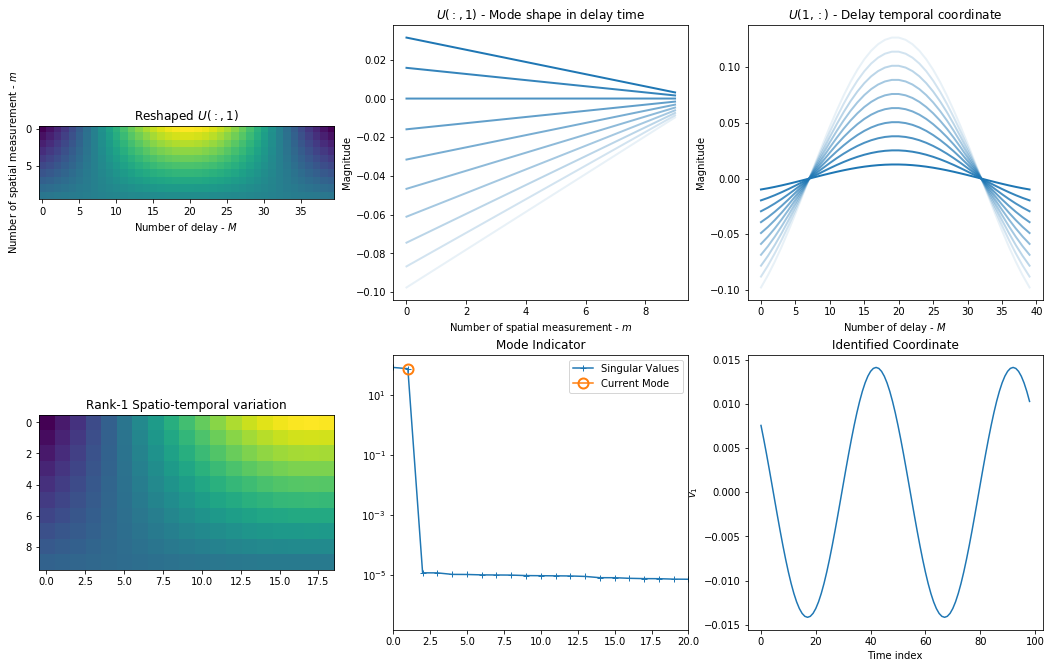

In [4]:
henkelsvd_modes(Modes, U, S, V, 1)

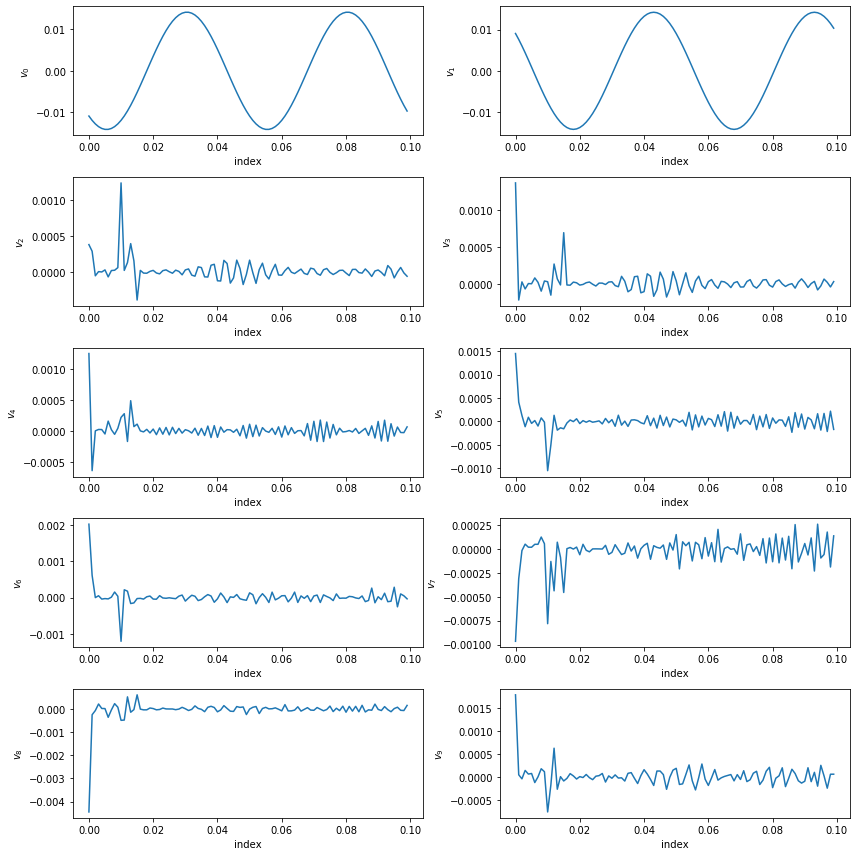

In [5]:
henkelsvd_coord(V,t)

### 2. Identical amplitude with various frequencies
Let's consider the following ficticious field:
\begin{equation}
    y_k = \mathrm{sin}(2\pi kt),\, k = 1,\,...\,,10
\end{equation}
This field is not continuous in its spatial direction.

====================== HenkelSVD =======================
Number of modes to return: 10
Rank of the data matrix: 10
======================= gHenkel =========================
---------------------------------------------------------
Geneal Henkel matrix is generated!
Delay time step: 1
Number of delay-coordinates: 40
Dimension of H: (400, 9961)
SVD to the delay-time-embedded data is done!


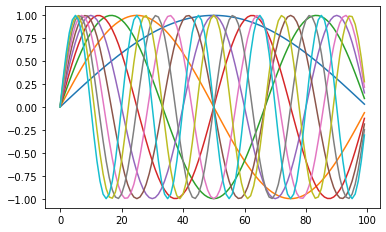

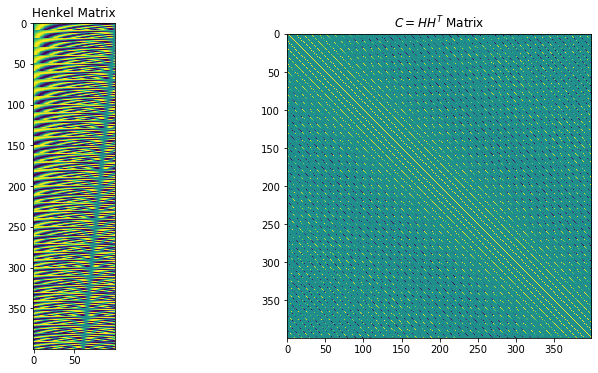

In [6]:
# Construct matrix whose rows are sinusoids with identical frequency and various amplitudes (third example in Chelidze and Zhou 2006)
n = 10000
tmax = 50
t = np.linspace(0,tmax,n)
k = 10
Y = np.zeros((k,len(t)),dtype = float)
m = np.shape(Y)[0]
fig, axes = plt.subplots(figsize=(6,6*0.618))
for i in np.arange(k):
    Y[i,:] = np.sin(2*np.pi*(i+1)*t)
    axes.plot(Y[i,0:100])

M = 40
d = 1
Modes, H, U, S, V = henkelsvd(Y, 40, 1, 10)

C = 1/M*np.dot(H,H.T)
fig, axes = plt.subplots(1,2,figsize=(12,6))
axes[0].imshow(H[:,0:100])
axes[0].set_title('Henkel Matrix')
axes[1].imshow(C)
axes[1].set_title('$C = HH^T$'+' Matrix')
plt.show()

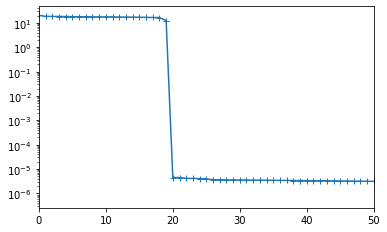

In [7]:
fig, axes = plt.subplots(figsize=(6,6*0.618))
axes.semilogy(np.sqrt(S),marker = '+')
axes.set_xlim(0,50)
plt.show()

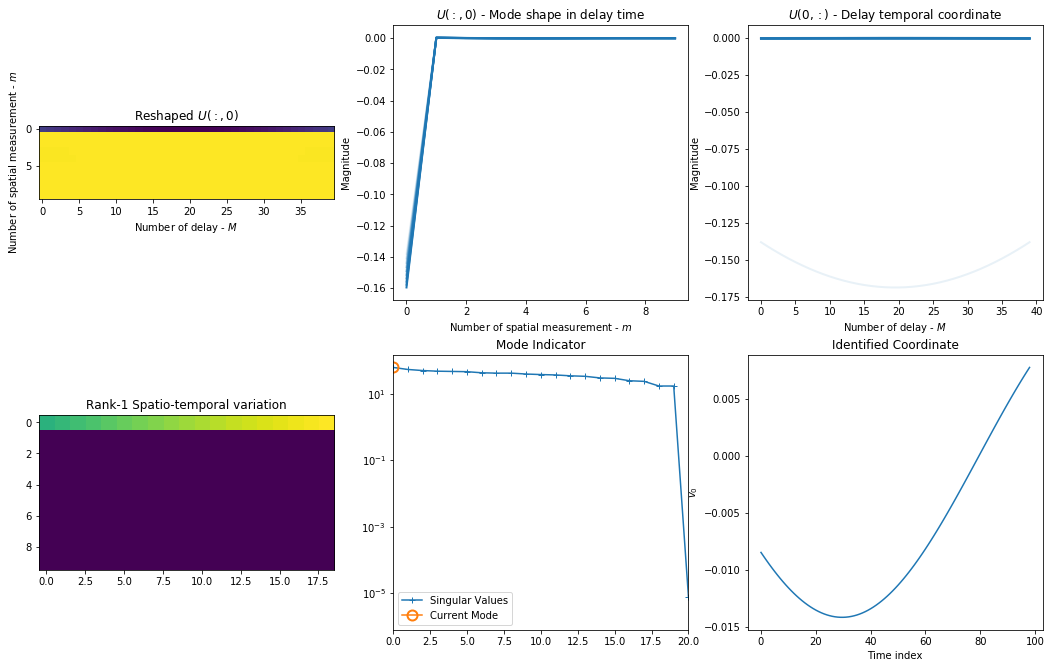

In [15]:
henkelsvd_modes(Modes, U, S, V, 0)

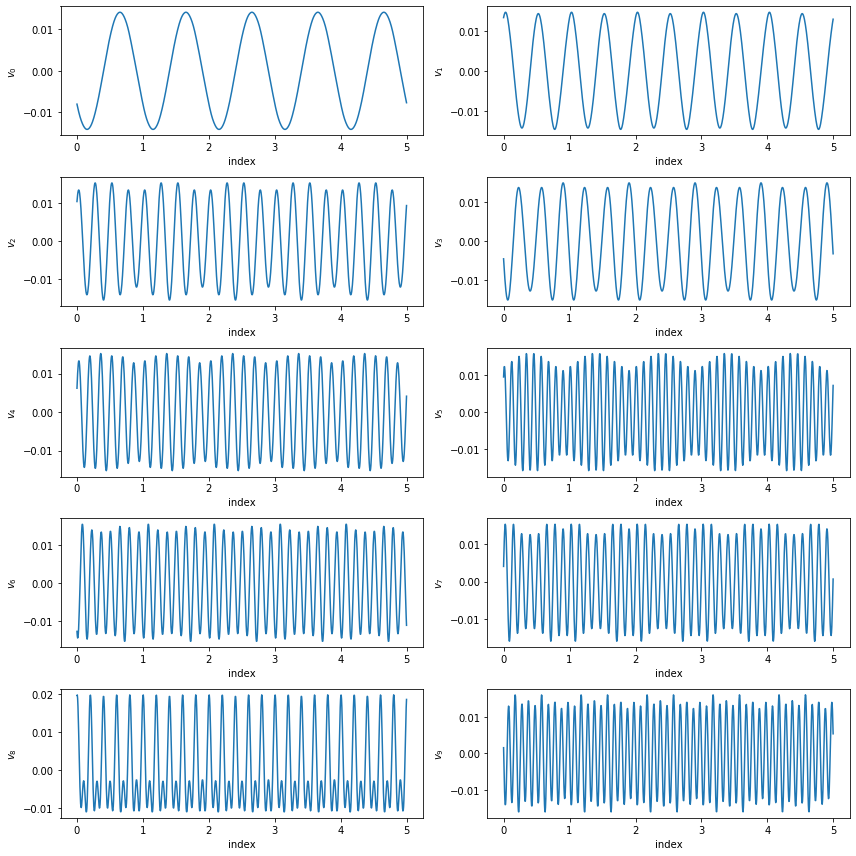

In [9]:
henkelsvd_coord(V,t,1000)

### 3. Both frequency and amplitude varies
Let's consider the following ficticious field:
\begin{equation}
    y_k = (11-i)\,\mathrm{sin}(2\pi kt),\, k = 1,\,...\,,10
\end{equation}
This field is not continuous in its spatial direction.

====================== HenkelSVD =======================
Number of modes to return: 10
Rank of the data matrix: 10
======================= gHenkel =========================
---------------------------------------------------------
Geneal Henkel matrix is generated!
Delay time step: 1
Number of delay-coordinates: 40
Dimension of H: (400, 9961)
SVD to the delay-time-embedded data is done!


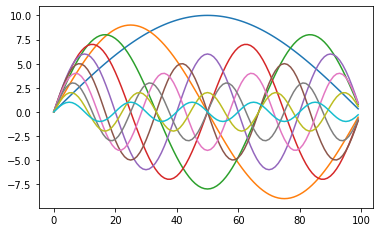

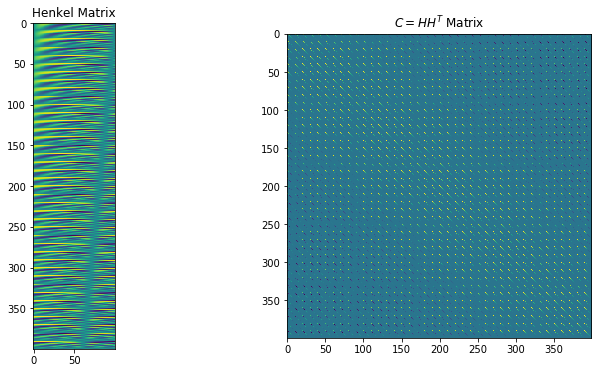

In [10]:
# Construct matrix whose rows are sinusoids with identical frequency and various amplitudes (third example in Chelidze and Zhou 2006)
n = 10000
tmax = 50
t = np.linspace(0,tmax,n)
k = 10
Y = np.zeros((k,len(t)),dtype = float)
m = np.shape(Y)[0]
fig, axes = plt.subplots(figsize=(6,6*0.618))
for i in np.arange(k):
    Y[i,:] = (10-i)*np.sin(2*np.pi*(i+1)*t)
    axes.plot(Y[i,0:100])

M = 40
d = 1
Modes, H, U, S, V = henkelsvd(Y, 40, 1, 10)

C = 1/M*np.dot(H,H.T)
fig, axes = plt.subplots(1,2,figsize=(12,6))
axes[0].imshow(H[:,0:100])
axes[0].set_title('Henkel Matrix')
axes[1].imshow(C)
axes[1].set_title('$C = HH^T$'+' Matrix')
plt.show()

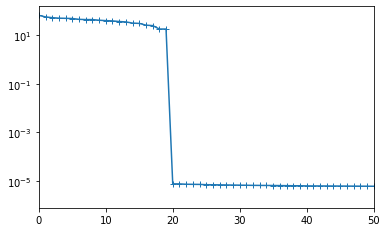

In [11]:
fig, axes = plt.subplots(figsize=(6,6*0.618))
axes.semilogy(np.sqrt(S),marker = '+')
axes.set_xlim(0,50)
plt.show()

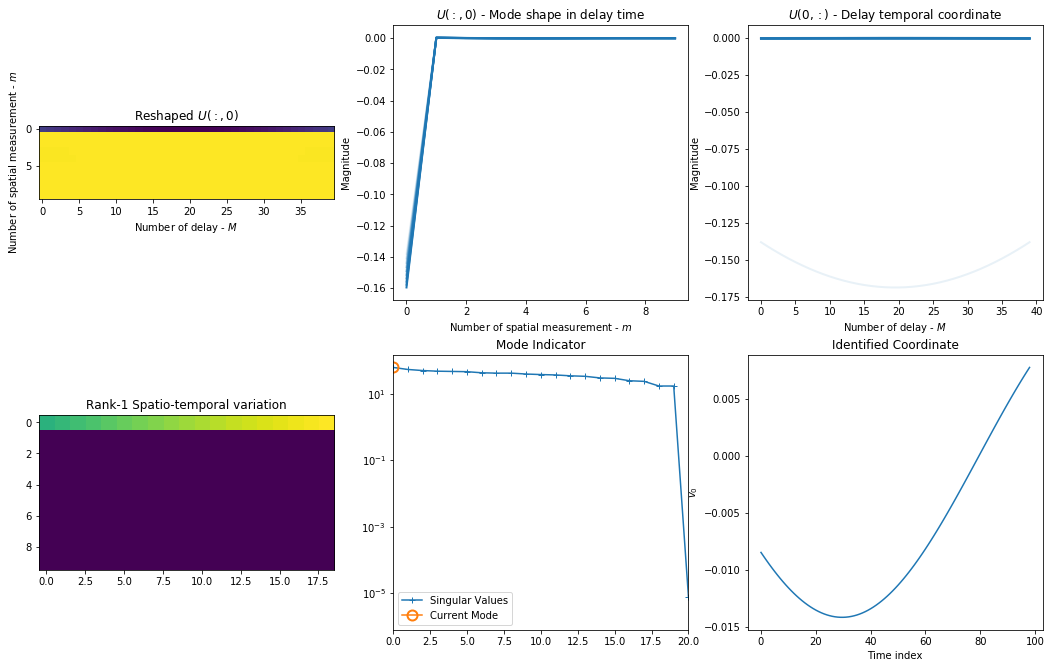

In [12]:
henkelsvd_modes(Modes, U, S, V, 0)

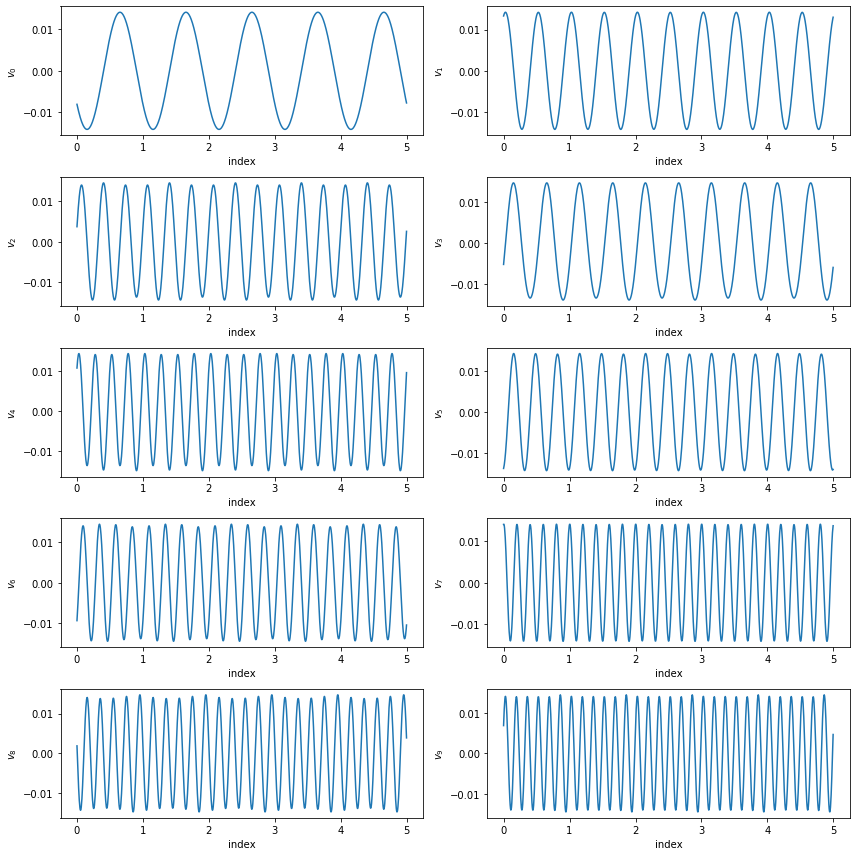

In [13]:
henkelsvd_coord(V,t,1000)